# Bank Marketing Prediction 

<b>Abstract:</b> The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification  goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”. 



<h1> Import Library

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

<h1> Data

<p class="normal">The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

In [79]:
print(os.listdir())

['.ipynb_checkpoints', 'Bank marketing prediction.pdf', 'Bank marketing prediction.zip', 'bank-marketing.csv', 'Data dictionary.txt', 'ML Project 1.ipynb']


In [80]:
df = pd.read_csv('bank-marketing.csv')

In [81]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [83]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<h3>Attribute Information:

Input variables:<br>
<h4> bank client data:</h4><br>
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - salary : salary(numeric)<br>
4 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
5 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
6 - targeted (categorical: 'no','yes','unknown')<br>
7 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
8 - balance : average yearly balance, in euros (numeric)<br>
9 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
10 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
<h4>related with the last contact of the current campaign:</h4><br>
11 - contact: contact communication type (categorical: 'cellular','telephone'))<br>
12 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri'))<br>
13 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec'))<br>
14 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.)<br>
<h4> other attributes:</h4><br>
15 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact))<br>
16 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)<br>
17 - previous: number of contacts performed before this campaign and for this client (numeric))<br>
18 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown))<br>
<br>
Output variables:<br>
19 - response : has the customer respond positively (categorical: 'no','yes','unknown')<br>

<h2>Univariate Analysis

<b>Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values? 

In [84]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

<b>Takeaway </b> <br>
We can see that 75% values of pdays are -1 and -1 means client was not previously contacted.
Here if we want to predict if the customer will respond positively to the campaign or not then we need to make decison on peaople who did have campaign previously so people who wasn't contacted before will have negative impact on prediction they need to be excluded

<B>Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values? 

filtering -1 values

In [85]:
df1=df[df['pdays'] > 0]

In [86]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [87]:
df1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

We can see drastic changes in mean and meadian while preiously mean and median was 40 and -1

<b>Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median? 

<AxesSubplot:ylabel='education'>

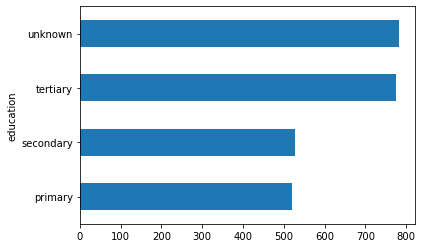

In [88]:
df1.groupby(['education'])['balance'].median().plot.barh()

customer with tertiary level of education has highest median value for balance

<b>Make a box plot for pdays. Do you see any outliers? 

<AxesSubplot:>

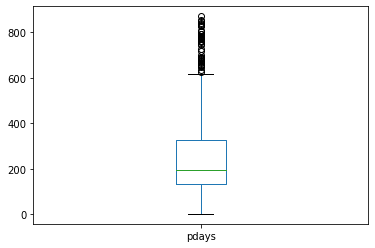

In [89]:
df1.boxplot( column =['pdays'], grid = False) 

There are outliers in pdays

<h2>Bi- variate Analysis</h2><br>
    To identify the features that are directly associated with the target variable.

<b>Convert the response variable to a convenient form 

In [90]:
df1.response.value_counts(normalize=True)

no     0.769287
yes    0.230713
Name: response, dtype: float64

In [91]:
df1.replace({'response': {"yes": 1,'no':0}},inplace=True)

In [92]:
df1.response.value_counts(normalize=True)

0    0.769287
1    0.230713
Name: response, dtype: float64

<b>Make suitable plots for associations with numerical features and categorical features’ 

In [93]:
# here we are seperating object and numerical data types 
obj_col = []
num_col = []
for col in df1.columns:
    if df1[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

In [94]:
print("Object data type features ",obj_col)
print("Numerical data type features ",num_col)

Object data type features  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical data type features  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


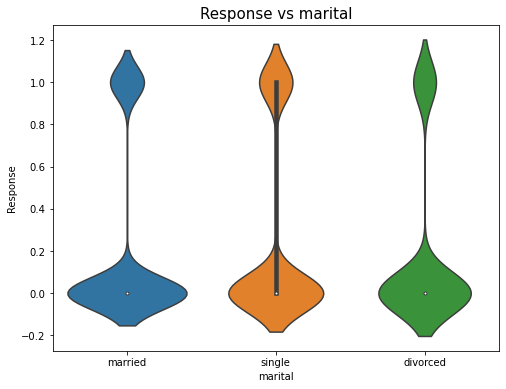

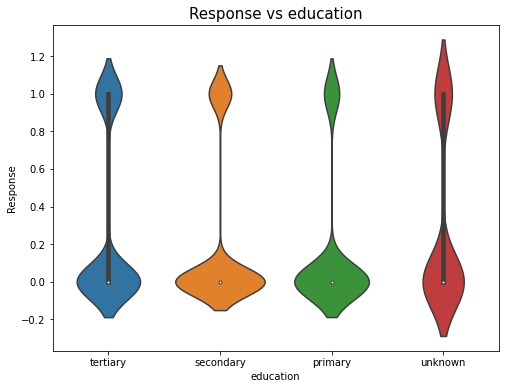

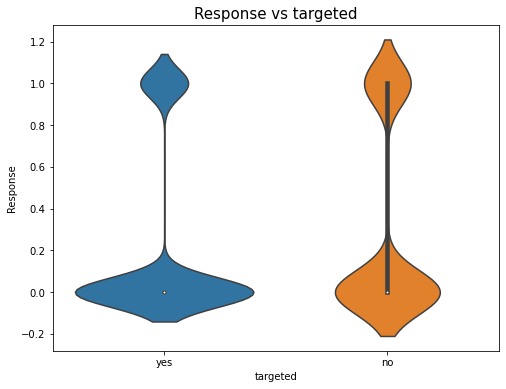

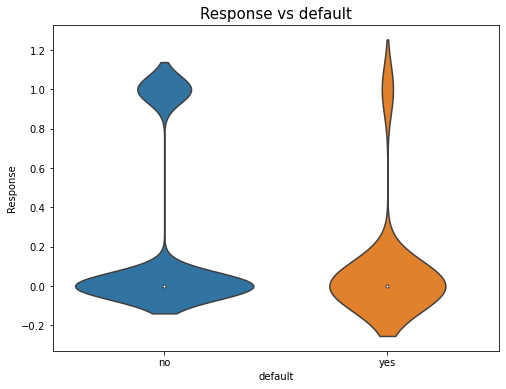

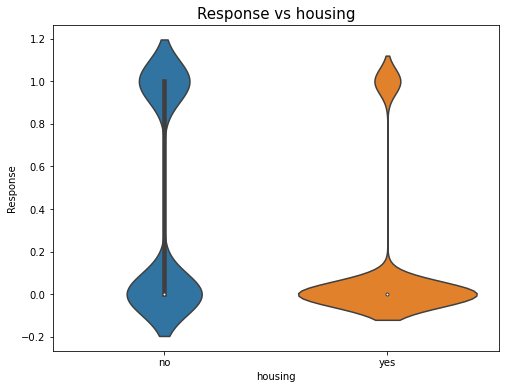

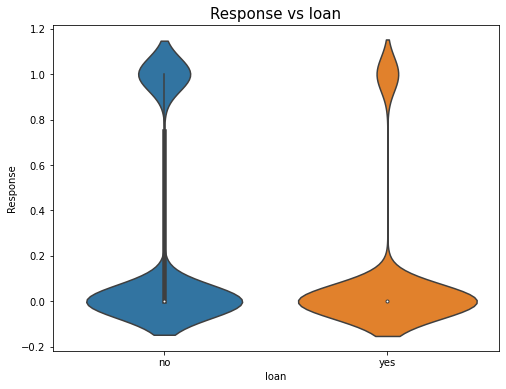

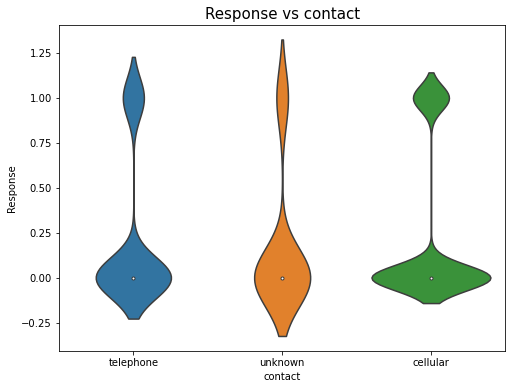

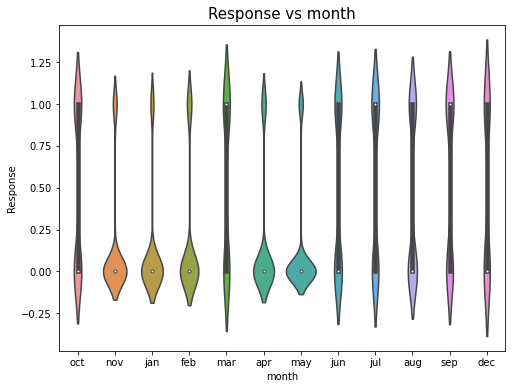

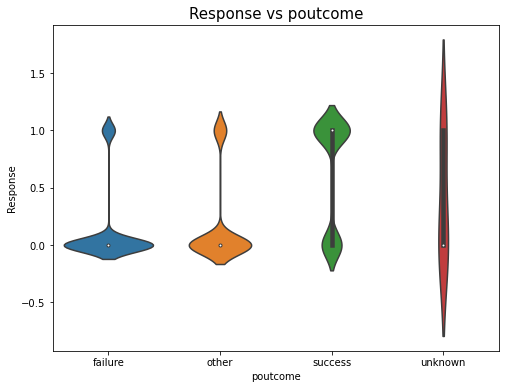

In [95]:
from numpy import median
for col in obj_col[1:]:
    plt.figure(figsize=(8,6))
    sns.violinplot(df1[col],df1["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()
#sns.despine()
# violin plots give best of both worlds 
# it gives boxplot and distribution of data like whether the data is skewed or not.
# if normally distributed then it's the best you can get.
# you can also use barplots in this case.

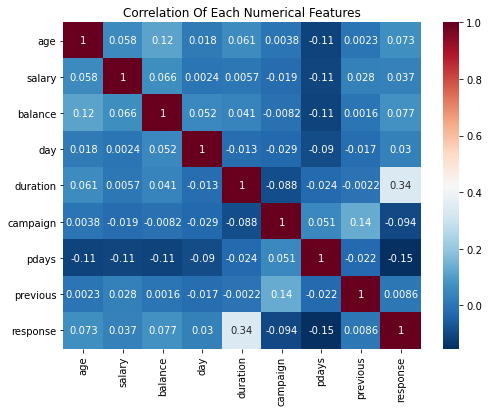

In [96]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(),annot=True,cmap='RdBu_r')
plt.title("Correlation Of Each Numerical Features")
plt.show()

we can see that duration variable is highly correlated with response variable 'Response Flag' . <br>
Whereas pdays variable is not highly correlated with response variable 'Response Flag'.

<Figure size 720x576 with 0 Axes>

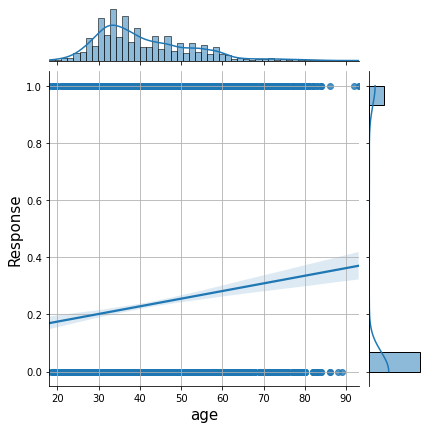

<Figure size 720x576 with 0 Axes>

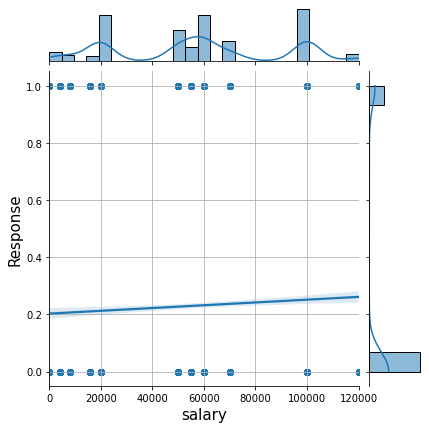

<Figure size 720x576 with 0 Axes>

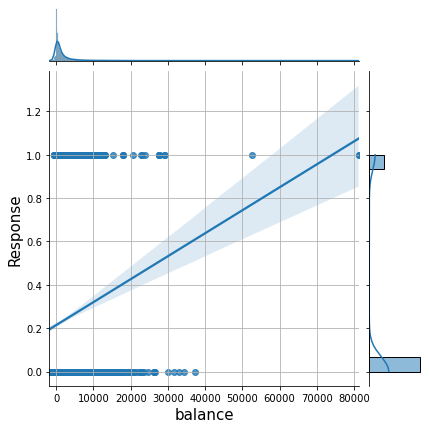

<Figure size 720x576 with 0 Axes>

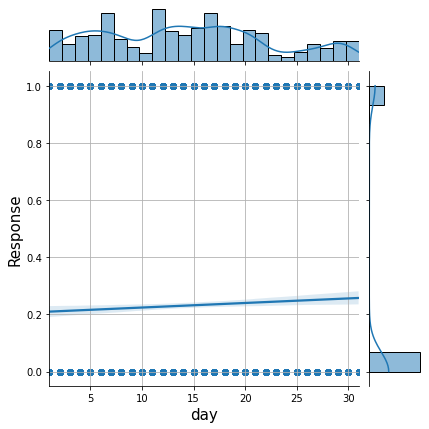

<Figure size 720x576 with 0 Axes>

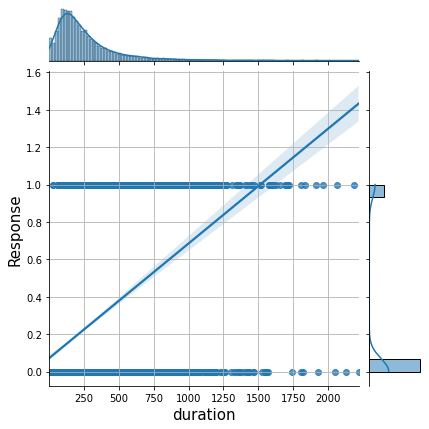

<Figure size 720x576 with 0 Axes>

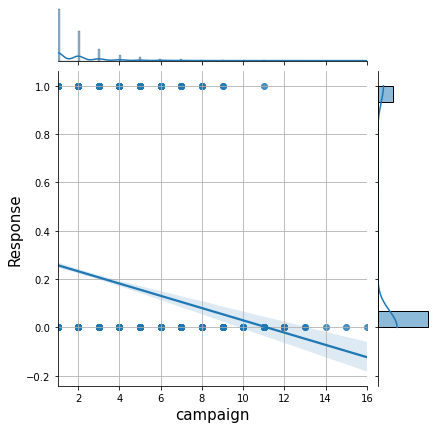

<Figure size 720x576 with 0 Axes>

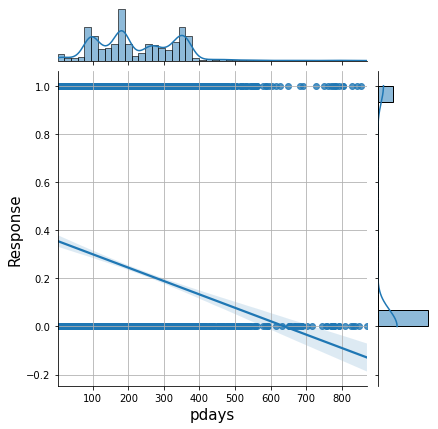

<Figure size 720x576 with 0 Axes>

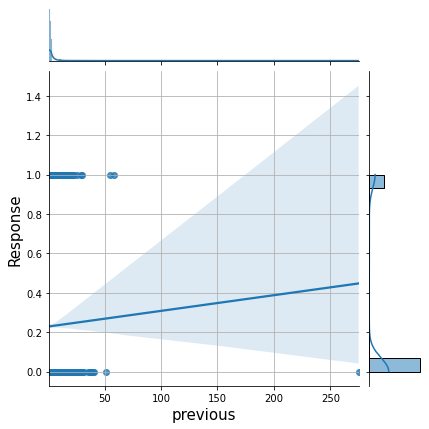

In [97]:
for col in num_col[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df1[col],y = df1["response"],kind='reg')
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

<B>Label Encoding of Categorical Variables

In [98]:
from sklearn.preprocessing import LabelEncoder
df2 = df1[obj_col].apply(LabelEncoder().fit_transform)
df2.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0


In [99]:
df3 = df2.join(df1[num_col])

In [100]:
df3.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1


In [101]:
df3.corr()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.072746,0.159280,-0.091197,-0.021012,-0.132378,-0.033500,-0.006279,-0.002498,0.066642,-0.020606,0.115271,0.041975,0.013841,0.024449,-0.008764,-0.110505,-0.000266,0.081239
marital,0.072746,1.000000,0.121688,-0.255247,-0.005632,-0.056963,-0.055435,-0.031866,-0.024130,0.045015,-0.414972,-0.042212,-0.019767,0.016797,-0.009075,-0.008338,-0.011861,0.004536,0.049234
education,0.159280,0.121688,1.000000,-0.632513,-0.013682,-0.129804,-0.047718,-0.048456,-0.010829,0.082852,-0.119516,0.423157,0.074166,0.023542,-0.001142,-0.024343,-0.140155,0.000115,0.108098
targeted,-0.091197,-0.255247,-0.632513,1.000000,0.019593,0.087470,0.070420,0.020464,0.010187,-0.071356,0.140750,-0.228338,-0.052007,-0.026179,-0.014729,0.017948,0.075638,-0.001205,-0.091216
default,-0.021012,-0.005632,-0.013682,0.019593,1.000000,0.022644,0.052261,-0.019834,0.020123,-0.025566,-0.027825,0.000361,-0.045010,-0.001013,-0.002635,-0.002064,0.033760,0.012149,-0.028299
housing,-0.132378,-0.056963,-0.129804,0.087470,0.022644,1.000000,0.109815,-0.069869,0.014452,-0.284439,-0.179386,-0.035905,-0.109163,-0.066740,-0.072070,0.063071,0.335124,0.008934,-0.317501
loan,-0.033500,-0.055435,-0.047718,0.070420,0.052261,0.109815,1.000000,-0.020904,0.000524,-0.103154,-0.008330,0.013788,-0.085004,0.007550,-0.033874,0.007444,0.022454,0.016549,-0.115805
contact,-0.006279,-0.031866,-0.048456,0.020464,-0.019834,-0.069869,-0.020904,1.000000,0.047045,0.024590,0.166384,-0.035805,0.030317,-0.012330,-0.036360,0.063199,0.077235,0.043830,-0.014321
month,-0.002498,-0.024130,-0.010829,0.010187,0.020123,0.014452,0.000524,0.047045,1.000000,-0.019188,0.013909,0.019820,0.015723,-0.024264,-0.036446,0.023224,0.022529,0.013977,-0.009586
poutcome,0.066642,0.045015,0.082852,-0.071356,-0.025566,-0.284439,-0.103154,0.024590,-0.019188,1.000000,0.051987,0.013079,0.051464,0.017125,0.108473,-0.000502,-0.235119,0.041607,0.420519


<h2>Model Building

<h3>Predictive model 1: Logistic regression 

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(42)
import warnings
warnings.filterwarnings("ignore")

In [103]:
X = df3.drop("response", axis=1)
X.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [104]:
y= df3[['response']]
y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=101)

In [106]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
X_train[:1]

(8257, 18)
(6605, 18)
(1652, 18)


,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
40201,4,1,2,1,0,1,0,0,6,0,38,100000,1354,8,127,3,130,2


In [107]:
lr = LogisticRegression()

In [108]:
lr.fit(X_train,y_train)

LogisticRegression()

In [109]:
cv_score= cross_val_score(lr,X_train,y_train, cv=5)
np.mean(cv_score)

0.7813777441332325

In [110]:
y_pred = lr.predict(X_test)

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1279
           1       0.58      0.18      0.27       373

    accuracy                           0.79      1652
   macro avg       0.69      0.57      0.57      1652
weighted avg       0.75      0.79      0.74      1652



In [112]:
confusion_matrix(y_pred,y_test)

array([[1231,  306],
       [  48,   67]], dtype=int64)

In [113]:
f1_score(y_pred,y_test)

0.27459016393442626

<h3>RFE

In [114]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(lr, 5)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [115]:
rfe.support_

array([False, False, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False])

In [116]:
X_train.columns[rfe.support_]

Index(['default', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')

In [117]:
cols = X_train.columns[rfe.support_]

In [118]:
lr.fit(X_train[cols],y_train)

LogisticRegression()

In [119]:
y_pred2 = lr.predict(X_test[cols])

In [120]:
f1_score(y_pred2,y_test)

0.497391304347826

In [121]:
confusion_matrix(y_pred2,y_test)

array([[1220,  230],
       [  59,  143]], dtype=int64)

<h3>use statsmodel

In [122]:
import statsmodels.api as sm

In [123]:
X_train.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
40201,4,1,2,1,0,1,0,0,6,0,38,100000,1354,8,127,3,130,2
38253,1,2,1,1,0,1,0,0,8,0,33,20000,1211,15,39,1,361,4
33245,1,2,1,1,0,0,0,0,0,0,33,20000,15341,20,335,1,334,3
44316,3,0,0,1,0,0,0,0,5,0,82,16000,1381,28,844,5,181,4
28642,4,0,2,0,0,1,1,0,4,0,46,100000,-154,29,150,2,247,2


<b>Add intercept manually for statsmodel to work

In [124]:
X_train_sm = sm.add_constant(X_train[cols])
X_train_sm.head()

,const,default,housing,loan,contact,poutcome
40201,1.0,0,1,0,0,0
38253,1.0,0,1,0,0,0
33245,1.0,0,0,0,0,0
44316,1.0,0,0,0,0,0
28642,1.0,0,1,1,0,0


In [125]:
lr1 = sm.OLS(y_train, X_train_sm).fit()

In [126]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     371.1
Date:                Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:40:23   Log-Likelihood:                -2856.4
No. Observations:                6605   AIC:                             5725.
Df Residuals:                    6599   BIC:                             5766.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2470      0.009     26.030      0.000       0.228       0.266
default       -0.0998      0.053     -1.880      0.060      -0.204       0.004
housing       -0.1834      0.010    -18.473      0.000      -0.203      -0.164
loan          -0.0593      0.014     -4.387      0.000      -0.086      -0.033
contact       -0.0567      0.014     -3.929      0.000      -0.085      -0.028
poutcome       0.1895      0.006     30.937      0.000       0.177       0.201
==============================================================================
Omnibus:                      767.943   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1060.272
Skew:                           0.968   Prob(JB):                    5.82e-231
Kurtosis:                       3.320   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3>VIF

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.72
3,targeted,6.43
2,education,6.39
11,salary,5.32
16,pdays,5.21
1,marital,4.37
13,day,4.10
8,month,3.59
5,housing,3.15
0,job,2.91


Housing, loan, default, poutcome are imp feature from logistic regression model perspective

<h2>Predictive model 2: Random Forest 

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)

In [131]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [132]:
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(cv1_score)

0.8376987130961393

In [133]:
y_pred1 = rfc.predict(X_test)

In [134]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1279
           1       0.79      0.42      0.55       373

    accuracy                           0.85      1652
   macro avg       0.82      0.70      0.73      1652
weighted avg       0.84      0.85      0.83      1652



In [135]:
f1_score(y_test,y_pred1)

0.5524475524475525

In [136]:
confusion_matrix(y_test,y_pred1)

array([[1238,   41],
       [ 215,  158]], dtype=int64)

In [137]:
from sklearn.metrics import roc_auc_score

In [138]:
roc_auc_score(y_test,y_pred1)

0.6957680996589578

<h3>RFE

In [139]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe1 = RFE(rfc, 5)
rfe1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=50,
                                     random_state=42),
    n_features_to_select=5)

In [140]:
rfe1.support_

array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False])

In [141]:
X_train.columns[rfe1.support_]

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

In [142]:
cols = X_train.columns[rfe1.support_]

In [143]:
rfc.fit(X_train[cols],y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [144]:
y_pred3 = rfc.predict(X_test[cols])

In [145]:
f1_score(y_pred3,y_test)

0.5928338762214984

In [146]:
confusion_matrix(y_pred3,y_test)

array([[1220,  191],
       [  59,  182]], dtype=int64)

Housing, month, pdays, poutcome, duration are imp feature from RANDOM FOREST perspective.